# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [92]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Using the duplicated function to comb through our merged data using Mouse ID and Timepoint as identifiers
Duplicated_mice = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
Duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [94]:
# Optional: Get all the data for the duplicate mouse ID. 

                              

In [115]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop(combined_data[combined_data["Mouse ID"]=="g989"].index, inplace=True)



In [117]:
# Checking the number of mice in the clean DataFrame.
combined_data["Mouse ID"].nunique()

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Standard Deviation": standard_dv, "Tumor Volume SEM": sem})
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice Tested')

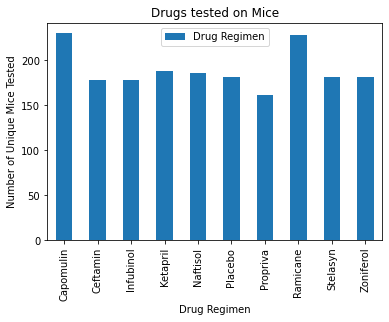

In [48]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
Drug_Regimen = combined_data.groupby("Drug Regimen")
Drug_Count = pd.DataFrame(Drug_Regimen["Drug Regimen"].count())
Bar_plot = Drug_Count.plot(kind='bar')
plt.title("Drugs tested on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

TypeError: only size-1 arrays can be converted to Python scalars

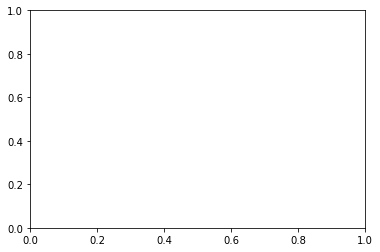

In [49]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
x_axis=np.arange(len(Drug_Count))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,Drug_Count,color="blue",align="center")


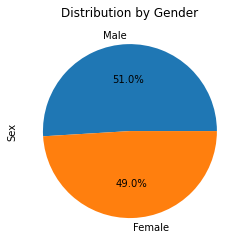

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Creating a tracker for data distribution between male and female:
Gender_Tracker = combined_data["Sex"].value_counts()
# Creating the Pie Chart
Gender_Pie = Gender_Tracker.plot.pie(title="Distribution by Gender",autopct="%1.1f%%")

Text(0.5, 1.0, 'Distribution by Gender')

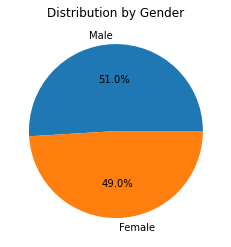

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_Tracker = combined_data["Sex"].value_counts()
plt.pie(Gender_Tracker,labels=Gender_Tracker.index,autopct="%1.1f%%")
plt.title("Distribution by Gender")

## Quartiles, Outliers and Boxplots

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Last_Timepoint = combined_data.groupby("Mouse ID")["Timepoint"].max()
Last_Timepoint_df = pd.DataFrame(Last_Timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Merged_Timepoint = pd.merge(Last_Timepoint_df,combined_data,on=("Mouse ID","Timepoint"))
Merged_Timepoint.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    Drug_df = Cleaned_Data.loc[combined_data["Drug Regimen"]==drug]
    Final_Timepoint_df = Drug_df.loc[Drug_df['Timepoint']==Drug_df['Timepoint']]
    Data=Final_Timepoint_df["Tumor Volume (mm3)"]
    tumor_vol_list.append(Data)
    Quartiles = Data.quantile([.25,.5,.75])
    UpperQuartile = Quartiles[0.75]
    LowerQuartile = Quartiles[0.25]
    IQR = UpperQuartile - LowerQuartile
    UpperBound = UpperQuartile + (1.5*IQR)
    LowerBound = LowerQuartile - (1.5*IQR)
    print(f'Lower Bound for {drug}: {LowerBound}')

    
    

AttributeError: 'NoneType' object has no attribute 'loc'

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
